<a href="https://colab.research.google.com/github/Shiwaninayak/FSM_Assessment-3/blob/main/Principal%20Component%20Analysis%20algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Load the iris dataset
df = pd.read_csv('/content/Iris Dataset.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
def PCA(X , num_components):
     
    #Step-1 Subtract the mean of each variable
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2 Calculate the Covariance Matrix
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3 Compute the Eigenvalues and Eigenvectors
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4 Sort Eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5 Select a subset from the rearranged Eigenvalue matrix
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6 Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced,sorted_eigenvalue 

In [57]:
data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
#Applying it to PCA function
X_reduced,sorted_eigenvalue = PCA(data , 2)
     
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])

# Add the target variable (Species) to the PCA DataFrame
principal_df['Species'] = df['Species']

corr_mat=np.corrcoef(data.T, X_reduced.T)

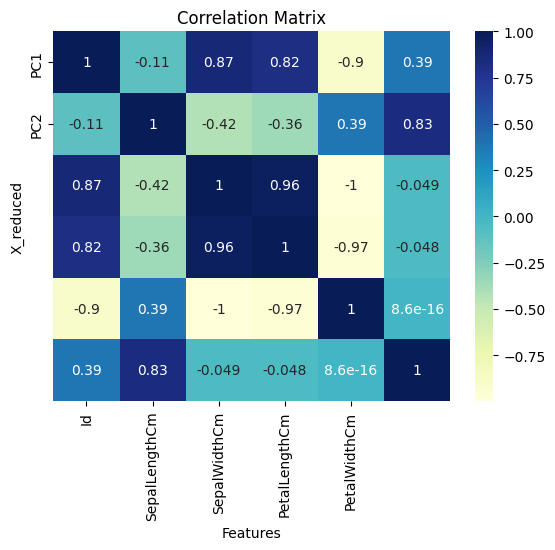

In [58]:
# heatmap of the correlation matrix
sns.heatmap(corr_mat, annot=True, cmap='YlGnBu', xticklabels=df.columns[:-1], 
            yticklabels=['PC1', 'PC2'])
plt.xlabel('Features')
plt.ylabel('X_reduced')
plt.title('Correlation Matrix')
plt.show()

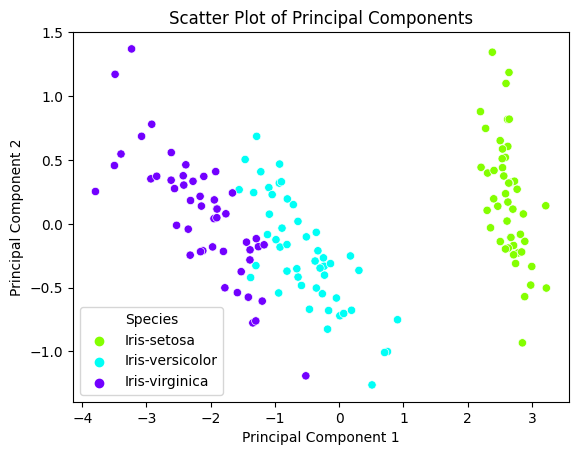

In [59]:
# Plot the scatter plot
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=principal_df, palette='hsv')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.show()

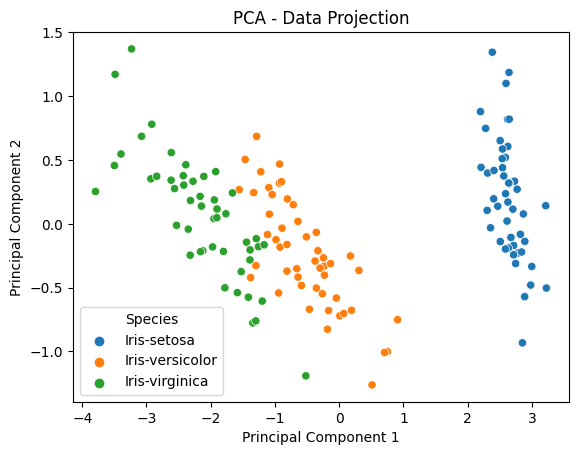

In [60]:
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=df['Species'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Data Projection')
plt.show()

In [61]:
principal_df

,PC1,PC2,Species
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa
...,...,...,...
145,-1.944017,0.187415,Iris-virginica
146,-1.525664,-0.375021,Iris-virginica
147,-1.764046,0.078519,Iris-virginica
148,-1.901629,0.115877,Iris-virginica
